# Sistemas Lineales<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

## Detección de Rostros con Haar Cascades
Haar Cascades es uno de los algoritmos más antiguos (pero aún útiles) para la detección de objetos. Afortunadamente, OpenCV viene con varios modelos pre-entrenados que podemos utilizara con distintos propósitos.

En este notebook usaremos Haar Cascades para detectar múltiples caras en una fotografía.

# Preliminares
Empecemos importando las librerías que necesitaremos.

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

Cargando la Imagen
Carguemos la imagen que usaremos para la detección facial. Carguémosla a color primero.

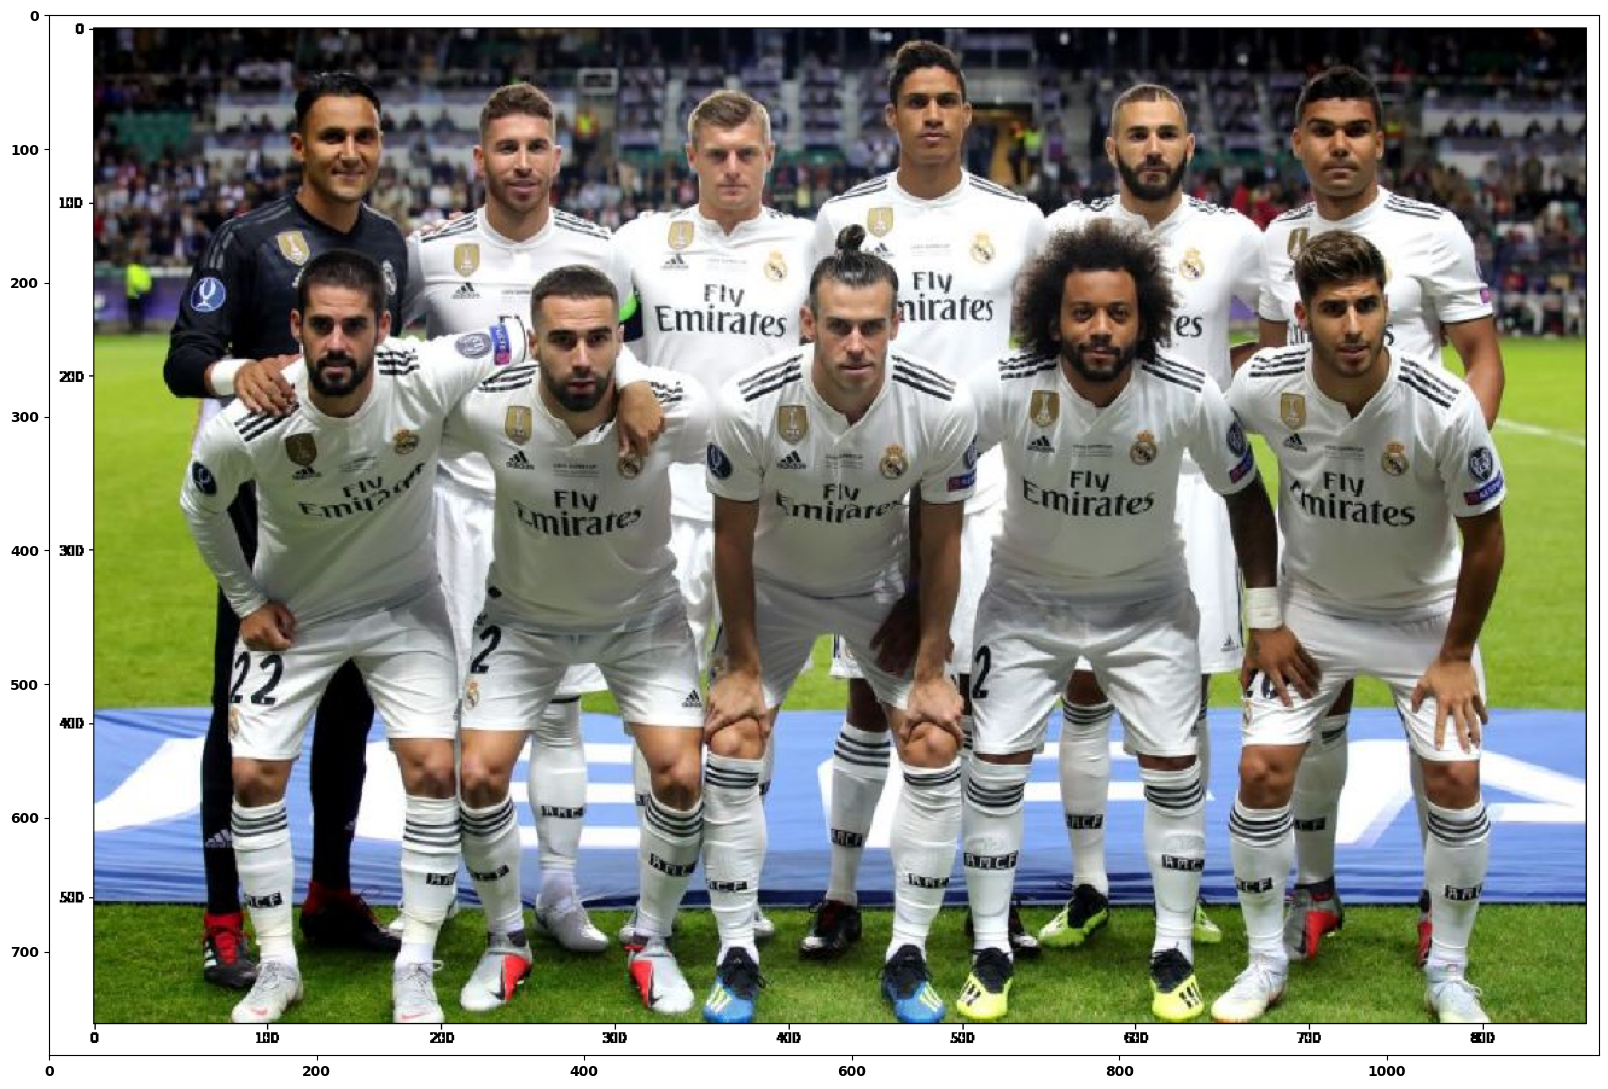

In [15]:
image = cv2.imread('images/RealMadrid.png')

# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.imshow(image)

Dado que el rostro humano contiene bastantes características no dependientes del color, podemos convertir nuestra imagen a escala de grises sin problema alguno.

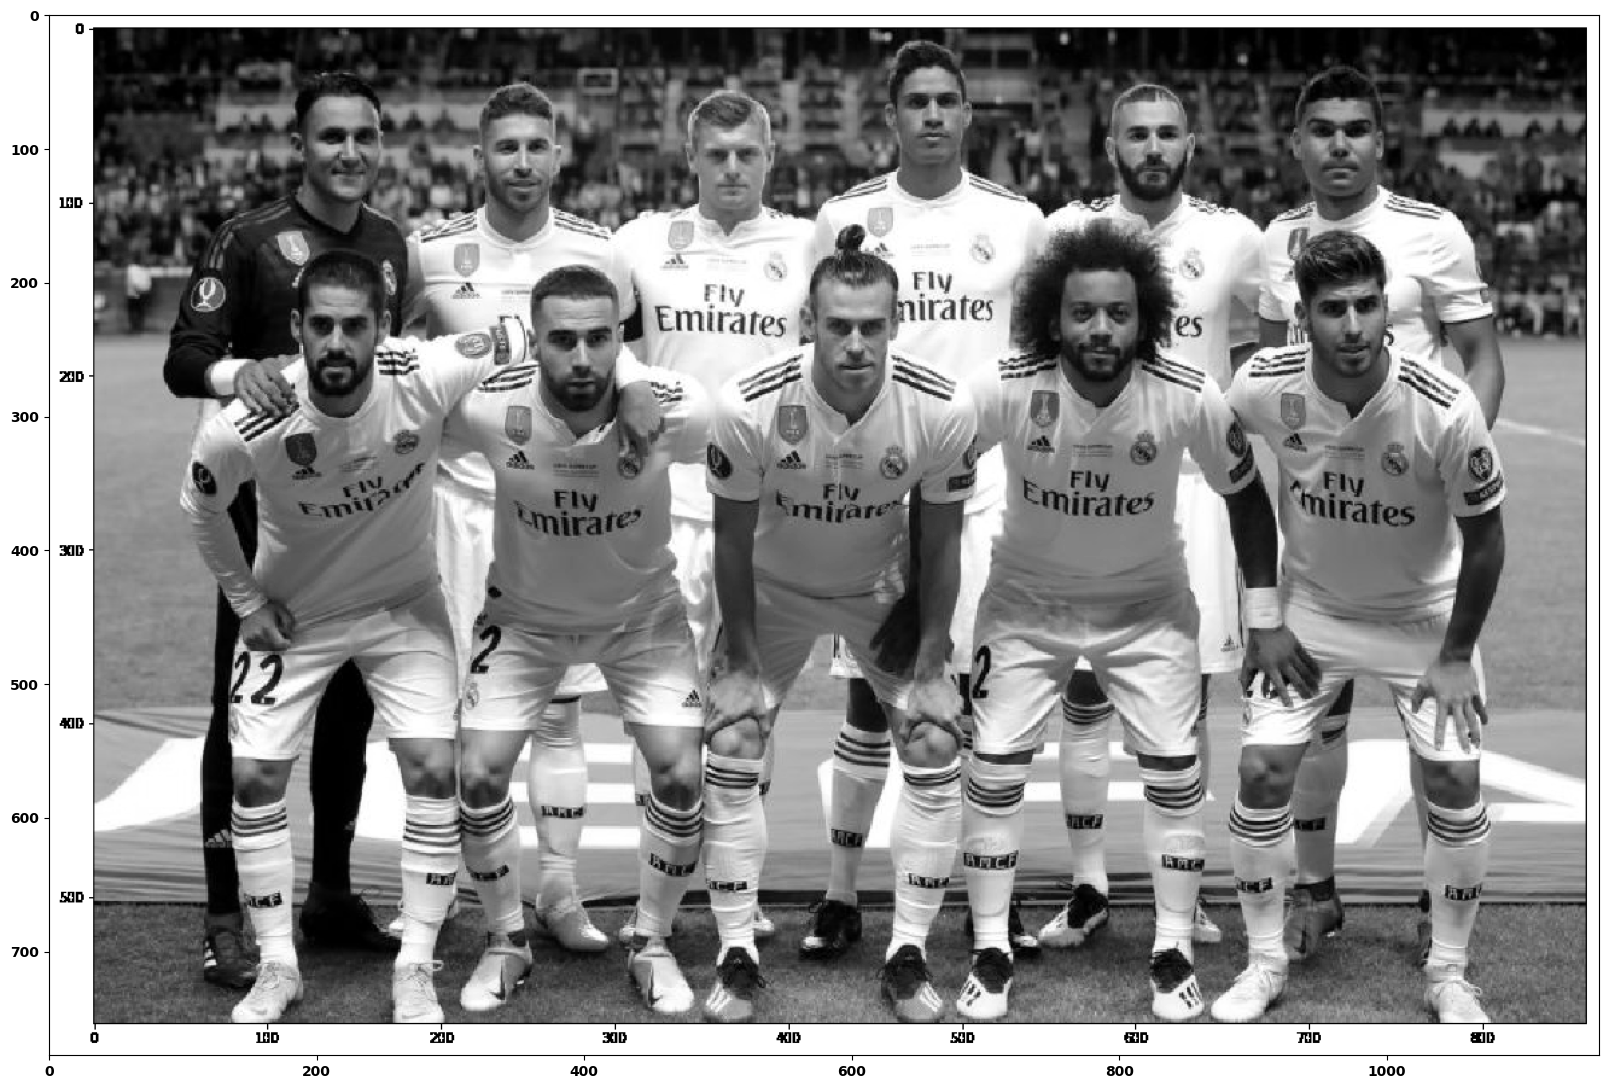

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 20))
plt.imshow(gray, cmap='gray')

Cargando el Modelo Pre-Entrenado
Carguemos un modelo pre-entrenado para detectar múltiples caras en una imagen. Los pesos/parámetros de este modelo están en el archivo detector_architectures/haarcascade_frontalface_default.xml.

Es importante mencionar que el número de rostros detectados está gobernado por la función detectMultiScale y sus entradas: image, scaleFactor, minNeighbors. Típicamente, con valores bajos de scaleFactor y minNeighbors podemos identificar más rostros, pero valores más altos tienden a producir mejores resultados.

In [17]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Run on the grayscale image
#faces = face_cascade.detectMultiScale(gray, 2, 6)
faces = face_cascade.detectMultiScale(image)
faces

array([[178, 205,  75,  75],
       [564, 205,  78,  78],
       [ 22,  98,  78,  78],
       [357, 213,  81,  81],
       [747, 193,  78,  78],
       [935, 191,  75,  75],
       [553,  66,  50,  50],
       [930,  60,  70,  70],
       [321,  74,  66,  66],
       [792,  64,  67,  67],
       [172, 349,  58,  58],
       [628,  40,  67,  67],
       [478,  79,  67,  67],
       [185,  62,  76,  76],
       [277, 362,  62,  62],
       [483, 194, 113, 113],
       [803, 534,  70,  70],
       [630, 550,  60,  60]])

El clasificador nos devuelve un arreglo de recuadros delimitadores para cada cara encontrada en la imagen.

In [18]:
print(f'{len(faces)} found.')
print('Coordinates in the following format: (X, Y, width, height)')
print('=============================')
print(faces)

18 found.
Coordinates in the following format: (X, Y, width, height)
[[178 205  75  75]
 [564 205  78  78]
 [ 22  98  78  78]
 [357 213  81  81]
 [747 193  78  78]
 [935 191  75  75]
 [553  66  50  50]
 [930  60  70  70]
 [321  74  66  66]
 [792  64  67  67]
 [172 349  58  58]
 [628  40  67  67]
 [478  79  67  67]
 [185  62  76  76]
 [277 362  62  62]
 [483 194 113 113]
 [803 534  70  70]
 [630 550  60  60]]


## Dibujando los Cuadros Delimitadores Alrededor de los Rostros Detectados
Finalmente, dibujemos los cuadros que nuestro algoritmo encontró encima de la imagen original para ver si dichas detecciones tienen sentido.

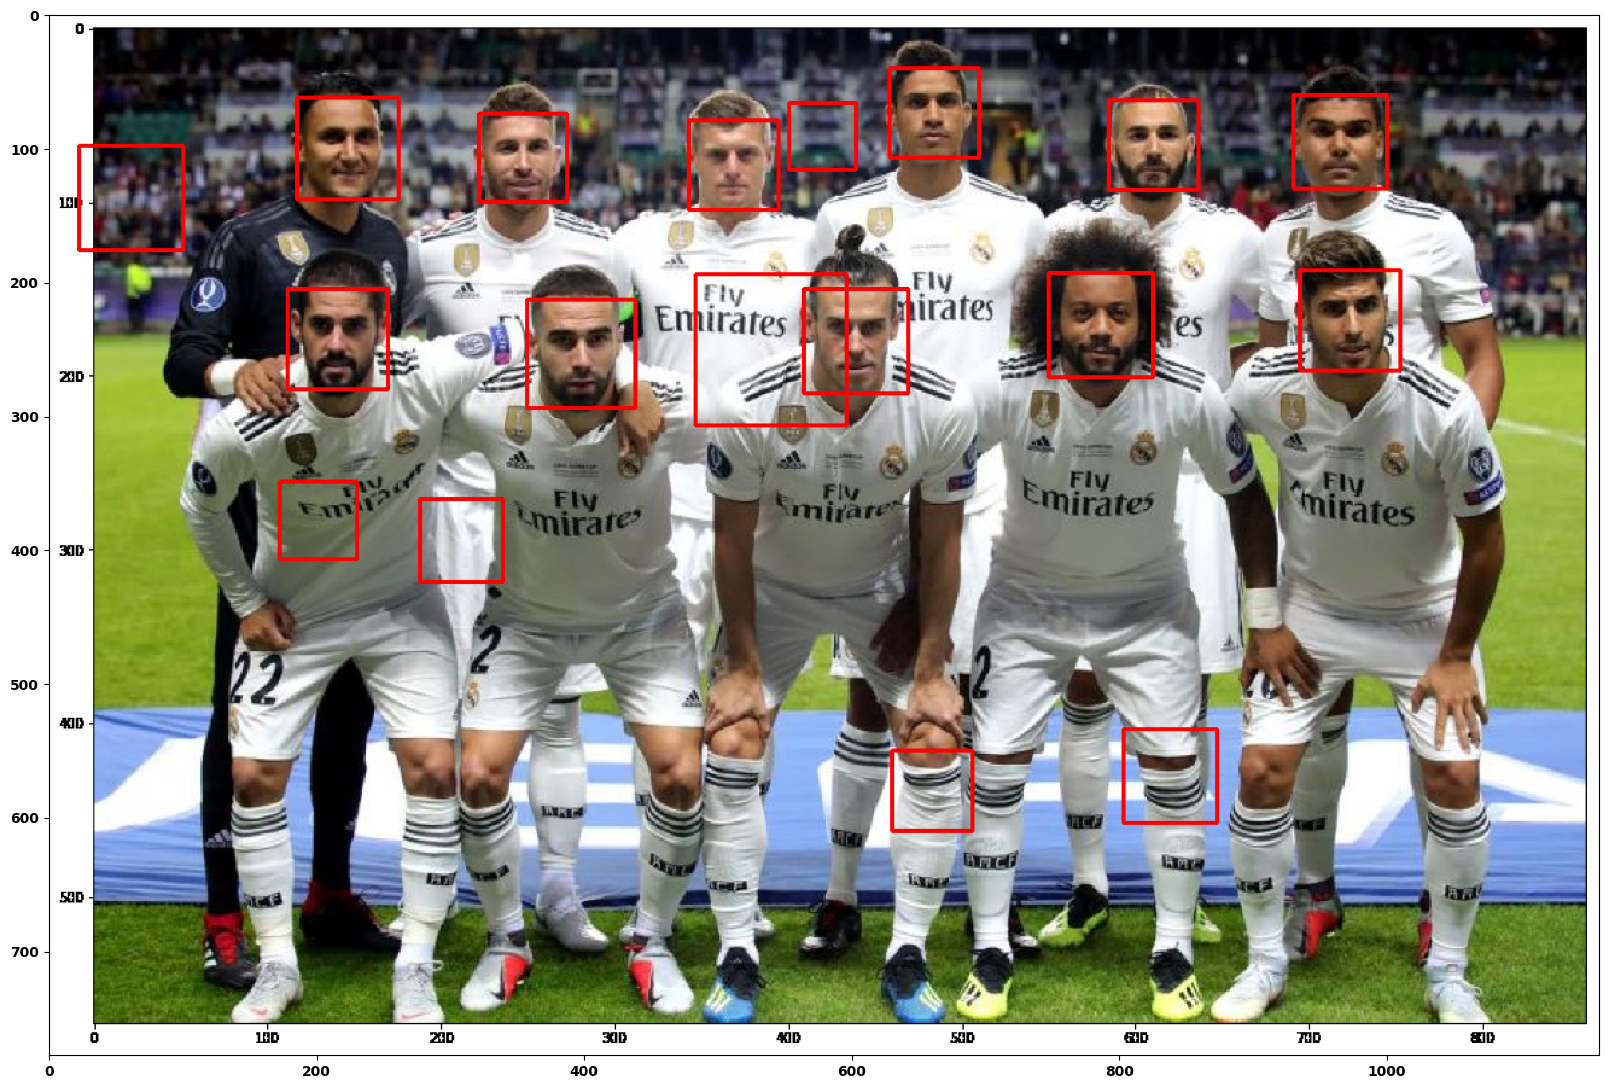

In [19]:
image_with_detections = np.copy(image)

for (x, y, width, height) in faces:
    cv2.rectangle(image_with_detections, (x, y), (x + width, y + height), (255, 0, 0), 2)
    
plt.figure(figsize=(20, 20))
plt.imshow(image_with_detections)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).